In [1]:
import torch
import corner
import numpy as np

## $p(\beta\mid\mathrm{HOD})$

In [2]:
levels =  1.0 - np.exp(-0.5 *np.array([1.0, 2.0]) ** 2)

corner_configs = {
    "smooth": 1.,
    "smooth1d": 0.75,
    "bins": 50,
    "levels": levels, # Assuming 'levels' is defined elsewhere
    "plot_datapoints": False,
    "plot_density": False,
    "labels": [r'b1', r'b2', r'b3', r'bG2', r'bG3', r'bk2']
}

Conditional sampling:

In [3]:
p_beta_hod = torch.load("../data/models/p_beta_hod.pt")
p_beta_hod.eval();

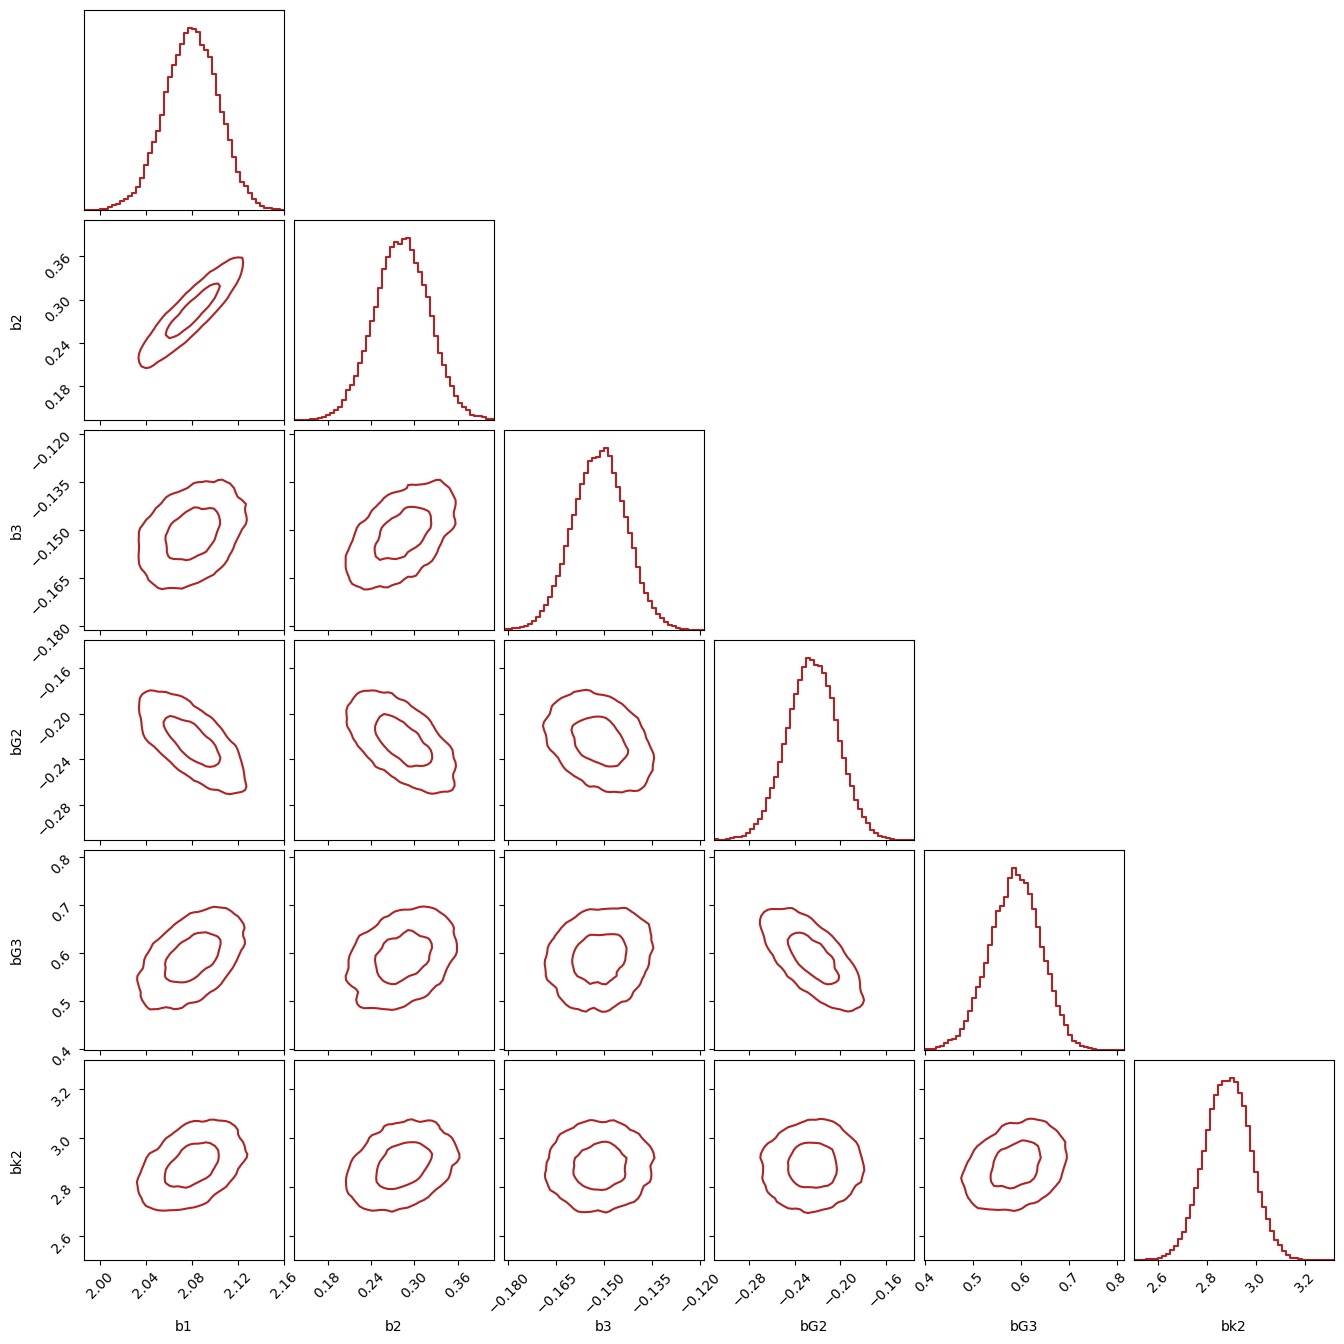

In [4]:
hod = torch.Tensor([1.2847e+01,  1.3797e+01, -1.5030e+00,  1.0978e+00,  7.4896e-01, -3.8828e-03, -5.9883e-03,])
beta_samples = p_beta_hod.sample(context=hod[None, ...], num_samples=10_000).detach().numpy()[0]

fig = corner.corner(beta_samples, **corner_configs, color='firebrick');

## $p(\beta)$

In [5]:
p_beta = torch.load("../data/models/p_beta.pt")
p_beta.eval();

Sampling:

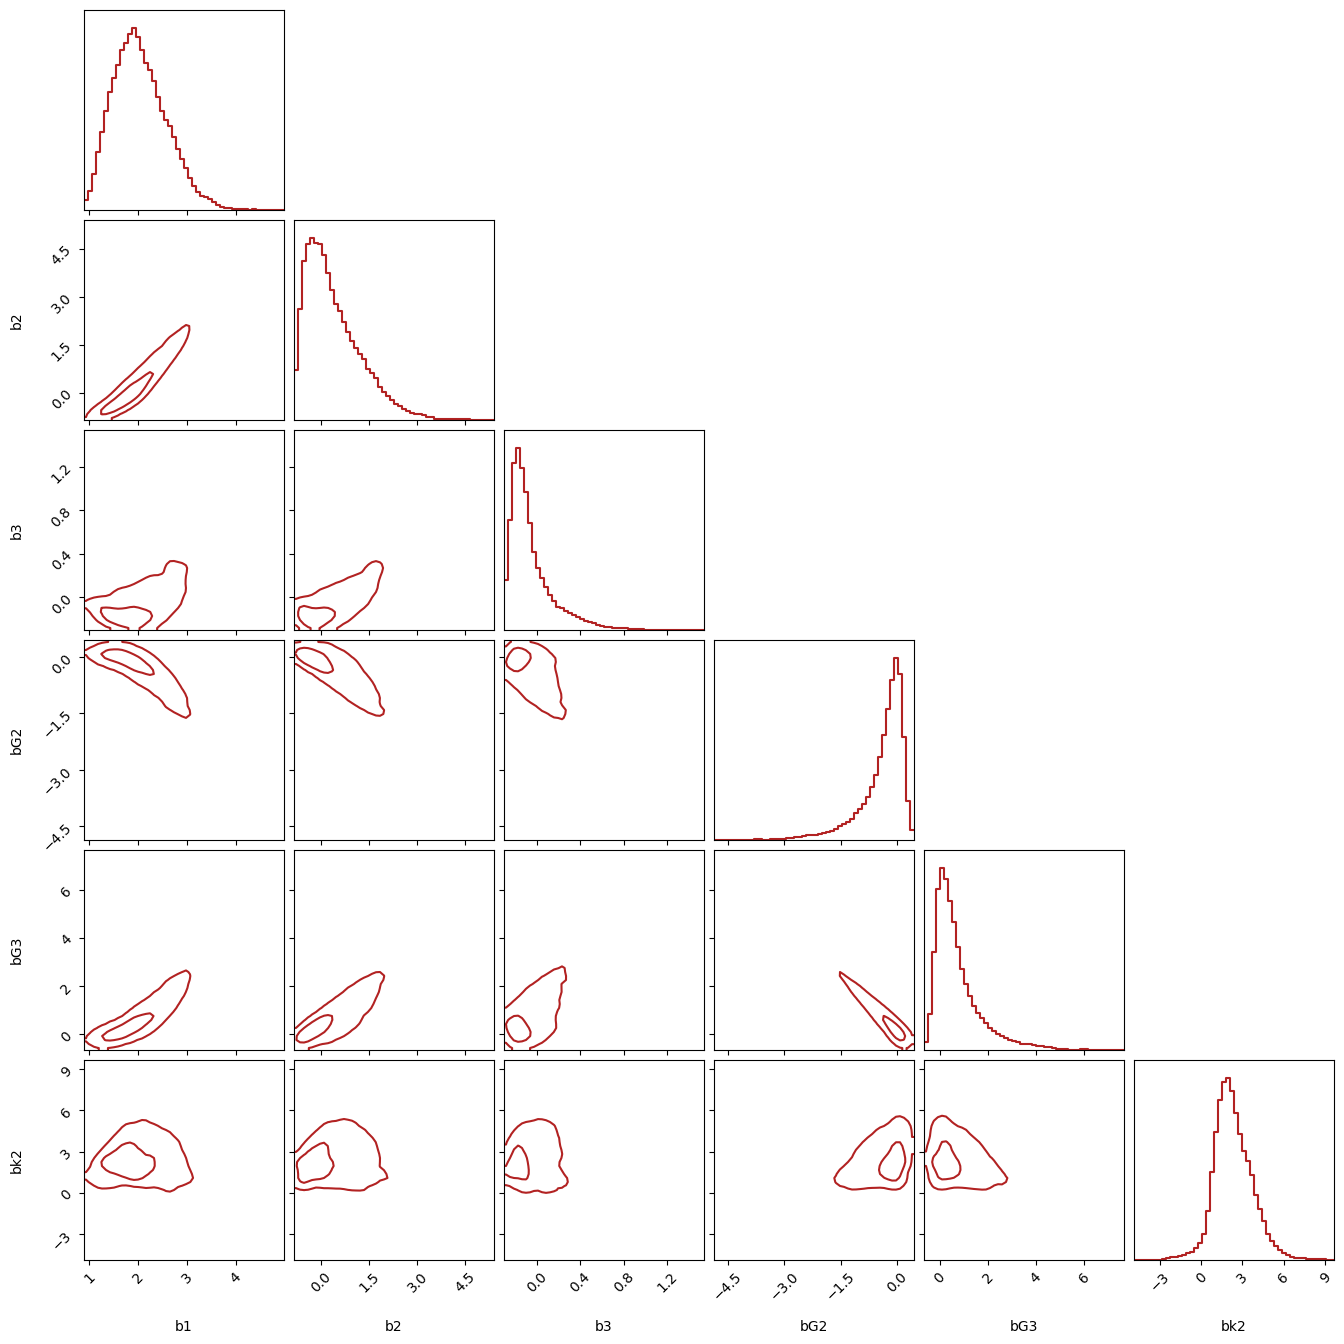

In [6]:
beta_samples = p_beta.sample(num_samples=10_000).detach().numpy()

fig = corner.corner(beta_samples, **corner_configs, color='firebrick');

Evaluate density for prior:

In [7]:
beta_x = torch.Tensor([2., 0., 0., 0., 0., 3.])
p_beta.log_prob(beta_x[None, ...])

tensor([-711.2667], grad_fn=<AddBackward0>)